In [53]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [129]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data


,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,NaN,NaN,...,14,NaN,NaN,197,NaN,NaN,1,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,NaN,NaN,...,1,NaN,NaN,27,NaN,NaN,1,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [130]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,NaN,...,195,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,NaN,...,14,NaN,NaN,256,NaN,NaN,1,NaN,NaN,NaN
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,NaN,...,98,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,NaN,...,14,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,NaN,...,1,NaN,NaN,215,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,NaN,...,14,NaN,NaN,131,NaN,NaN,1,NaN,NaN,NaN
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,NaN,...,12,NaN,NaN,279,NaN,NaN,1,NaN,NaN,NaN
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,NaN,...,4,NaN,NaN,66,NaN,NaN,1,NaN,NaN,NaN
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN


In [131]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 464 entries, Wip Line_Dam to target
dtypes: float64(350), int64(77), object(37)
memory usage: 143.4+ MB


In [132]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 465 entries, Set ID to target
dtypes: float64(351), int64(77), object(37)
memory usage: 61.6+ MB


In [133]:
train_data.shape[0]

40506

In [134]:
# 'tt' 칼럼 추가
train_data['tt'] = 'train'
test_data['tt'] = 'test'

In [137]:
train_target = train_data['target']
testSet = test_data['Set ID']
test_target = test_data['target']

In [138]:
test_data = test_data.drop(columns=['Set ID', 'target'])

In [139]:
train_data = train_data.drop(columns = ['target'])

In [140]:
# 데이터프레임 결합
df = pd.concat([train_data, test_data], ignore_index=True)

In [141]:
# 각 열별 결측치 개수 확인
missing_values_count = (df.isnull().sum())
missing_values_count = missing_values_count/df.shape[0] 
missing_values_ratio = missing_values_count * 100
print(missing_values_ratio)

Wip Line_Dam                       0.0
Process Desc._Dam                  0.0
Equipment_Dam                      0.0
Model.Suffix_Dam                   0.0
Workorder_Dam                      0.0
                                 ...  
Receip No Judge Value_Fill2      100.0
WorkMode Collect Result_Fill2      0.0
WorkMode Unit Time_Fill2         100.0
WorkMode Judge Value_Fill2       100.0
tt                                 0.0
Length: 464, dtype: float64


In [142]:
bins = [0, 20, 40, 60, 80, 100]
missing_values_counts = pd.cut(missing_values_ratio, bins=bins).value_counts().sort_index()

print(missing_values_counts)

(0, 20]        0
(20, 40]       3
(40, 60]       0
(60, 80]       5
(80, 100]    278
Name: count, dtype: int64


(20, 40]에 대해서는 결측치를 채우는 과정을 수행한다.

In [143]:
# 결측치 비율이 80 이상인 열 삭제
threshold = 80
df= df.drop(columns=missing_values_ratio[missing_values_ratio >= threshold].index)


## 데이터 탐색

칼럼들을 각 공정 단계 별로 구별하여 집중해서 보도록 한다.

In [144]:
# "Process Desc"를 포함하는 열의 인덱스 찾기
process_columns = [col for col in df.columns if "Process Desc" in col]
process_indices = [df.columns.get_loc(col) for col in process_columns]

# 새로운 DataFrame을 저장할 딕셔너리 초기화
dfs = {}

# Process Desc에 따라 DataFrame을 나누어 저장
for i, start_idx in enumerate(process_indices):
    end_idx = process_indices[i + 1]-1 if i + 1 < len(process_indices) else len(df.columns)-1
    
    # 각 Process Desc와 그에 해당하는 환경 변수들을 포함하는 DataFrame 생성
    relevant_columns = df.columns[start_idx:end_idx]
    dfs[f'df{i+1}'] = df[relevant_columns]

# 나눠진 DataFrame들을 확인
for name, df_subset in dfs.items():
    print(f'{name}:')
    print(df_subset)
    print('\n')

df1:
      Process Desc._Dam     Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0         Dam Dispenser  Dam dispenser #1      AJX75334505    4F1XA938-1   
1         Dam Dispenser  Dam dispenser #1      AJX75334505    3KPM0016-2   
2         Dam Dispenser  Dam dispenser #2      AJX75334501    4E1X9167-1   
3         Dam Dispenser  Dam dispenser #2      AJX75334501    3K1X0057-1   
4         Dam Dispenser  Dam dispenser #1      AJX75334501    3HPM0007-1   
...                 ...               ...              ...           ...   
57862     Dam Dispenser  Dam dispenser #2      AJX75334501    3K1XB597-1   
57863     Dam Dispenser  Dam dispenser #2      AJX75334501    4A1XB974-1   
57864     Dam Dispenser  Dam dispenser #1      AJX75334501    3L1XA998-1   
57865     Dam Dispenser  Dam dispenser #1      AJX75334501    3F1XC376-1   
57866     Dam Dispenser  Dam dispenser #1      AJX75334501    3J1XC756-1   

       Insp. Seq No._Dam Insp Judge Code_Dam  \
0                      1          

In [145]:
df1 = dfs['df1']
df2 = dfs['df2']
df3 = dfs['df3']
df4 = dfs['df4']

상수 변수 탐지 : 모든 항이 동일한 상수 변수의 경우 가치가 존재하지 않는다.

In [146]:
# 상수 열 찾기
constant_columns1 = [col for col in df1.columns if df1[col].nunique() == 1]
constant_columns1

['Process Desc._Dam',
 'Insp. Seq No._Dam',
 'Insp Judge Code_Dam',
 'CURE STANDBY POSITION X Collect Result_Dam',
 'CURE STANDBY POSITION Z Collect Result_Dam',
 'CURE STANDBY POSITION Θ Collect Result_Dam',
 'CURE START POSITION Z Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam']

In [149]:
# 상수 열 삭제
df1_cleaned = df1.drop(columns=constant_columns1)
print(df1_cleaned.shape[1])
print(df1.shape[1])

69
77


In [150]:
def remove_constant_columns(df):
    """
    DataFrame에서 상수 열(모든 값이 동일한 열)을 찾아 삭제하고, 삭제된 열의 이름을 반환합니다.
    
    Parameters:
    df (pd.DataFrame): 상수 열을 삭제할 DataFrame

    Returns:
    tuple: (상수 열이 제거된 DataFrame, 삭제된 상수 열의 리스트)
    """
    # 상수 열 찾기
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    
    # 상수 열 출력
    print("삭제된 상수 열:", constant_columns)
    
    # 상수 열 삭제
    df_cleaned = df.drop(columns=constant_columns)
    
    return df_cleaned, constant_columns

In [151]:
df2_cleaned, constant_columns2 = remove_constant_columns(df2)
df3_cleaned, constant_columns3 = remove_constant_columns(df3)
df4_cleaned, constant_columns4 = remove_constant_columns(df4)

삭제된 상수 열: ['Process Desc._AutoClave', 'Equipment_AutoClave', 'Insp. Seq No._AutoClave', 'Insp Judge Code_AutoClave', '1st Pressure Judge Value_AutoClave', '2nd Pressure Judge Value_AutoClave', '3rd Pressure Judge Value_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave']
삭제된 상수 열: ['Process Desc._Fill1', 'Insp. Seq No._Fill1', 'Insp Judge Code_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1']
삭제된 상수 열: ['Process Desc._Fill2', 'Insp. Seq No._Fill2', 'Insp Judge Code_Fill2', 'CURE END POSITION Θ Collect Result_Fill2', 'CURE STANDBY POSITION X Collect Result_Fill2', 'CURE STANDBY POSITION Θ Collect Result_Fill2', 'CURE START POSITION Θ Collect Result_Fill2', 'DISCHARGED SPEED OF RESIN Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2', 'Dispense Volume(Stage1) Colle

# 중복값 확인 및 제거

공정 단계 별로 봤을 때 중복값이 존재한다.

In [152]:
df.shape

(57867, 186)

In [153]:
print(df.duplicated(keep = False).sum())

0


In [154]:
print(df1_cleaned.duplicated(keep = False).sum())

0


In [155]:
print(df2_cleaned.duplicated(keep = False).sum())

57476


In [156]:
print(df3_cleaned.duplicated(keep = False).sum())

2


In [157]:
print(df4_cleaned.duplicated(keep = False).sum())

2


## 피처 줄이기를 위한 상관 관계 및 의미 분석.
df2는 빼고 진행한다.
좌표를 합칠 수 있다면 좋아 보이기도 함.

In [158]:
df1_cleaned.columns

Index(['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam',
       'CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Θ Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
       'Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage1) Col

In [159]:
# 새로운 칼럼 생성
df1_cleaned['CURE POSITION (X, Z, Θ)'] = list(zip(df1_cleaned['Equipment_Dam'],
                                        df1_cleaned['CURE END POSITION X Collect Result_Dam'],
                                        df1_cleaned['CURE END POSITION Z Collect Result_Dam'],
                                        df1_cleaned['CURE END POSITION Θ Collect Result_Dam'],
                                        df1_cleaned['CURE START POSITION X Collect Result_Dam'],
                                        df1_cleaned['CURE START POSITION Θ Collect Result_Dam']))

In [160]:
# unique 값의 개수 출력
unique_count = df1_cleaned['CURE POSITION (X, Z, Θ)'].nunique()
print(f"Unique 값의 개수: {unique_count}")

Unique 값의 개수: 2


In [161]:
df1_cleaned = df1_cleaned.drop(df1_cleaned.columns[df1_cleaned.columns.str.contains('Equipment_Dam|CURE START|CURE END')], axis=1)

이진 분류가 가능한 항목이다. 장비에 따라서 시작 위치와 종료 위치가 결정된다.    
총 4개의 x,y,z,theta 조합이 있을 때 1,2,3,4  
cure 위치는 항상 1->3 or 2->4이다.  
cure 속도와 연합하면 도움이 될까? cure 시간을 도출할 수 있어 보임.

토출 시간이 stage 별로 나뉘어져 있다.완벽한 시간(비율로 보면 될까?)
토출양도 전체 stage 별로 나뉘어져 있다.
어쩌면 토출 속도도 중요하지 않을까 양도 너무 많으면 좋지 않아보임.
column을 새로 생성하는 것도 좋을 것 같다.

X, Z, Θ의 종류는 하나밖에 없다.

Equipment_Dam: 사용된 장비의 식별자.  
Model.Suffix_Dam: 모델
의 접미사.  
Workorder_Dam: 작업 지시서 번호.  
CURE END POSITION X/Z/Θ Collect Result_Dam: 경화 종료 위치의 X, Z, Θ 좌표.  
CURE SPEED Collect Result_Dam: 경화 속도.  
CURE START POSITION X/Θ Collect Result_Dam: 경화 시작 위치의 X, Θ 좌표.  
DISCHARGED SPEED OF RESIN Collect Result_Dam: 레진 방출 속도.  
DISCHARGED TIME OF RESIN(Stage1/2/3) Collect Result_Dam: 각 단계에서의 레진 방출 시간.



Dispense Volume(Stage1/2/3) Collect Result_Dam: 각 단계에서의 분배량.


HEAD NORMAL COORDINATE X/Y/Z AXIS(Stage1/2/3) Collect Result_Dam: 각 단계에서의 헤드 정상 좌표.  
HEAD Standby Position X/Y/Z Collect Result_Dam: 헤드 대기 위치의 X, Y, Z 좌표.  
Head Clean Position X/Y/Z Collect Result_Dam: 헤드 청소 위치의 X, Y, Z 좌표.  
Head Purge Position X/Y/Z Collect Result_Dam: 헤드 퍼지 위치의 X, Y, Z 좌표.  
Head Zero Position X/Y/Z Collect Result_Dam: 헤드 제로 위치의 X, Y, Z 좌표.  
Machine Tact time Collect Result_Dam: 기계 접촉 시간. * 접촉 시간은 중요  
PalletID Collect Result_Dam: 팔레트 식별자.  
Production Qty Collect Result_Dam: 생산 수량.  
Receip No Collect Result_Dam: 영수증 번호.  
Stage1/2/3 Circle1/2/3/4 Distance Speed Collect Result_Dam: 각 단계와 원의 거리 속도.  
Stage1/2/3 Line1/2/3/4 Distance Speed Collect Result_Dam: 각 단계와 선의 거리 속도.  
THICKNESS 1/2/3 Collect Result_Dam: 두께 측정값.  
WorkMode Collect Result_Dam: 작업 모드.  

In [162]:
# 'OK' 값을 결측치로 처리
df1_cleaned.loc[df1_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] == 'OK', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] = None

In [163]:
(df1_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull().sum())/df1.shape[0]

0.5946048697876164

In [164]:
# 컬럼 드랍
df1_cleaned = df1_cleaned.drop(columns=['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'])

In [165]:
for column in categorical_columns:
    df1_cleaned[column] = df1_cleaned[column].apply(lambda x: str(x))

In [166]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 범주형 열 선택
categorical_columns = df1_cleaned.select_dtypes(include=['object']).columns

# label encoder 생성
label_encoder = LabelEncoder()

# 범주형 열 label encoding
for column in categorical_columns:
    df1_cleaned[column] = label_encoder.fit_transform(df1_cleaned[column])

# 정규화할 열 선택
numerical_columns = df1_cleaned.select_dtypes(include=['float64', 'int64']).columns

# standard scaler 생성
scaler = StandardScaler()

# 정규화
for column in numerical_columns:
    df1_cleaned[column] = scaler.fit_transform(df1_cleaned[column].values.reshape(-1, 1))

In [167]:
from scipy import stats

z_scores = stats.zscore(df1_cleaned)
filtered_df1 = df1_cleaned[np.abs(z_scores) < 2.5]

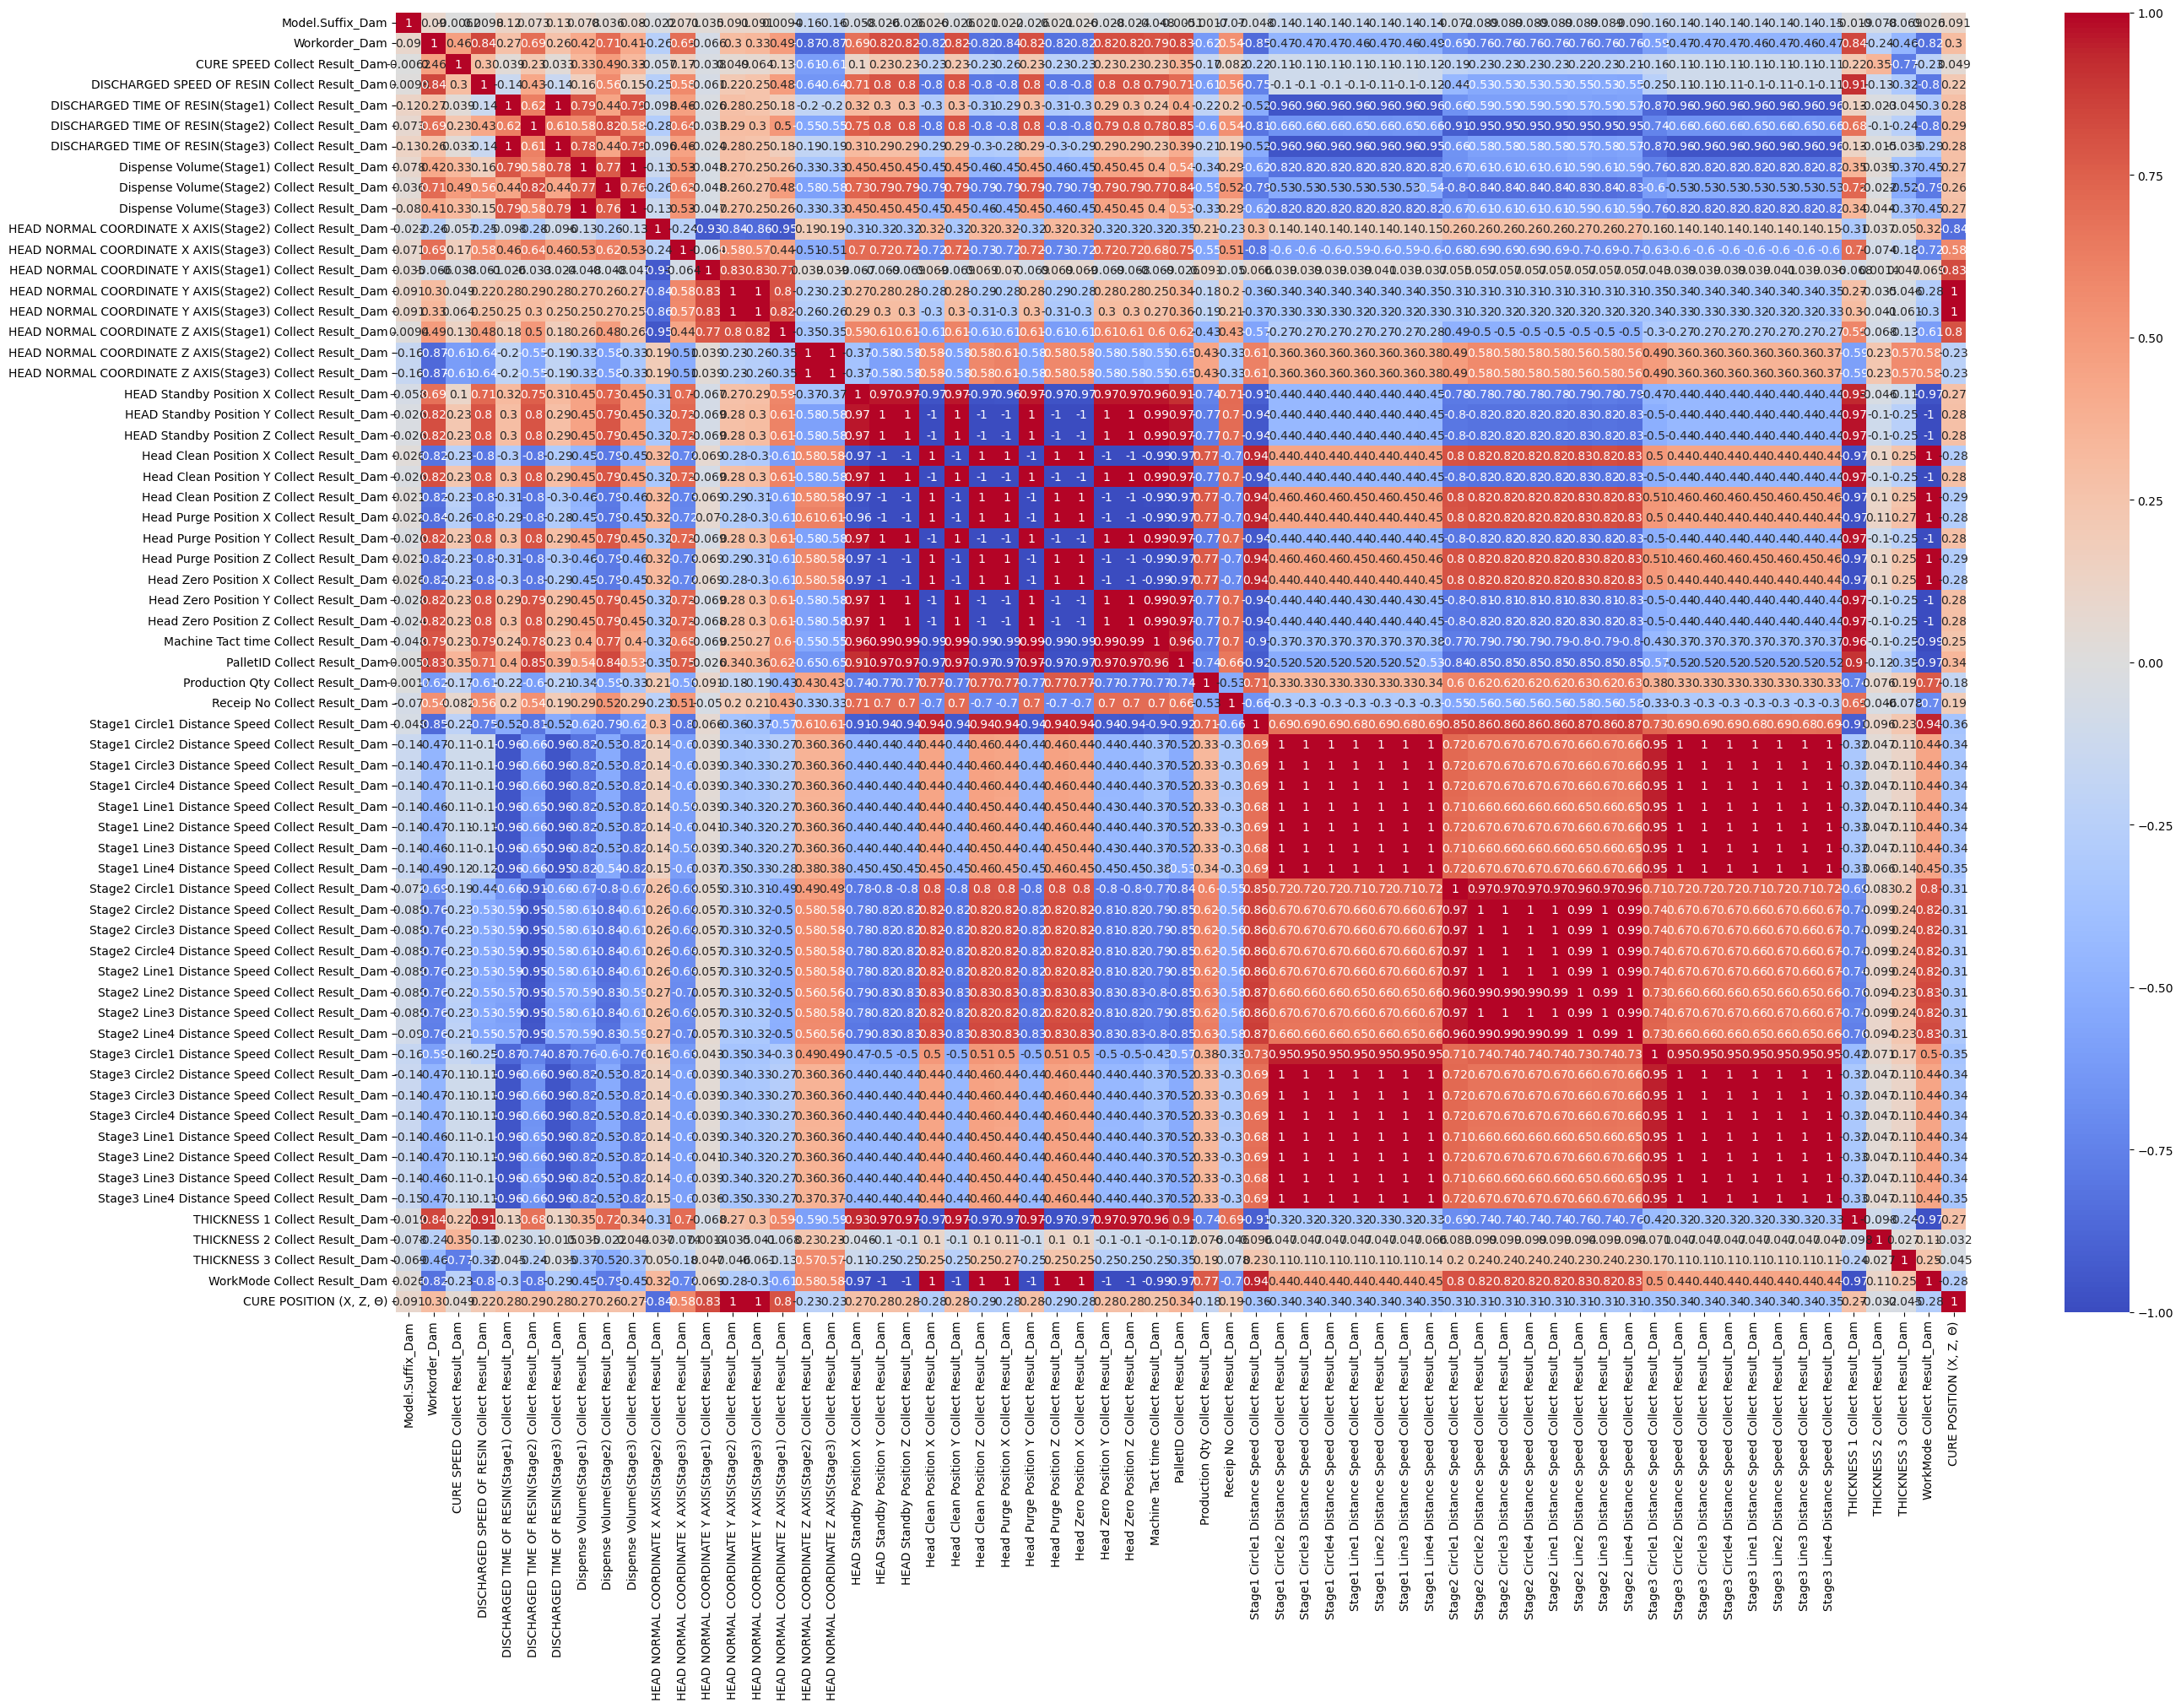

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
# 상관 행렬 계산
corr_matrix = filtered_df1.corr()

# 히트맵 그리기
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [170]:

from sklearn.decomposition import PCA

# 결측값을 평균값으로 대체
filtered_df1.fillna(filtered_df1.mean(), inplace=True)
# 상관 행렬 계산
corr_matrix = filtered_df1.corr().abs()

# 절댓값 0.9 이상의 상관관계를 가진 피처들 식별
high_corr_var = np.where(corr_matrix > 0.95)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

# 고상관 피처들 추출
high_corr_features = list(set([item[0] for item in high_corr_var]))

# PCA 적용
pca = PCA(n_components=5)  # 원하는 성분 수 설정
pca_result = pca.fit_transform(filtered_df1[high_corr_features])

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(pca_result.shape[1])])

# 저상관 피처들 추출
low_corr_features = [col for col in filtered_df1.columns if col not in high_corr_features]

# 최종 데이터셋 결합
final_df1 = pd.concat([filtered_df1[low_corr_features], pca_df], axis=1)

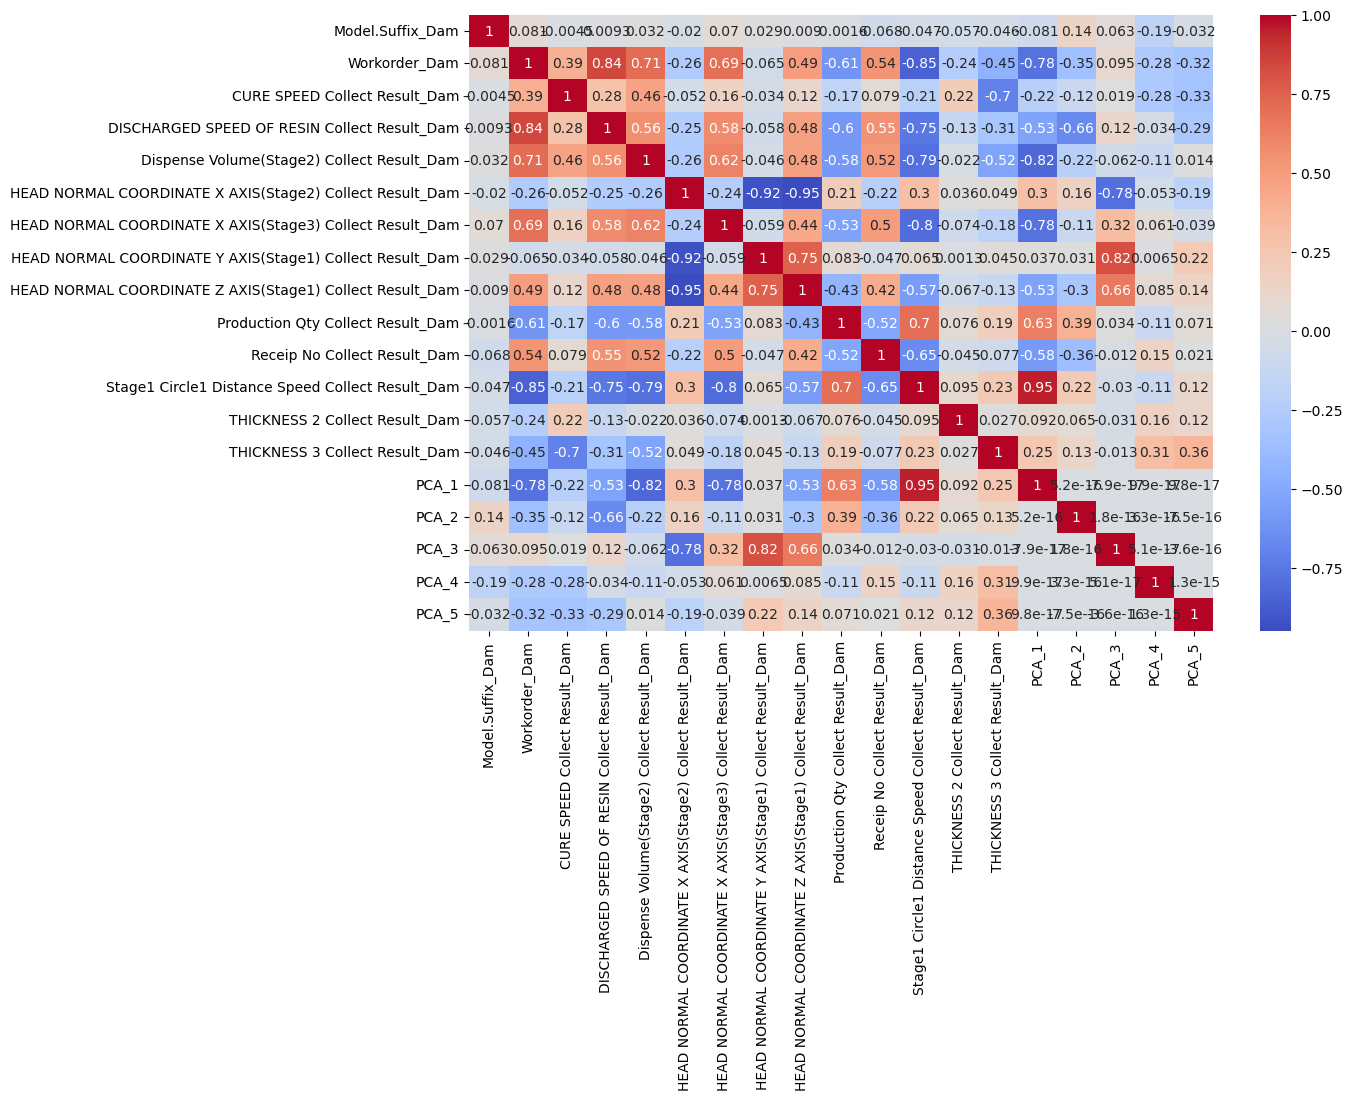

In [171]:
corr_matrix = final_df1.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [182]:
# 각 Stage에서의 DISCHARGED 양 계산
df3_cleaned['DISCHARGED_AMOUNT_STAGE1'] = df3_cleaned['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] * df3_cleaned['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1']
df3_cleaned['DISCHARGED_AMOUNT_STAGE2'] = df3_cleaned['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] * df3_cleaned['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1']
df3_cleaned['DISCHARGED_AMOUNT_STAGE3'] = df3_cleaned['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] * df3_cleaned['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']

# Dispense 양과 DISCHARGED 양의 상관계수 계산
correlation_stage1 = np.corrcoef(df3_cleaned['DISCHARGED_AMOUNT_STAGE1'], df3_cleaned['Dispense Volume(Stage1) Collect Result_Fill1'])[0, 1]
correlation_stage2 = np.corrcoef(df3_cleaned['DISCHARGED_AMOUNT_STAGE2'], df3_cleaned['Dispense Volume(Stage2) Collect Result_Fill1'])[0, 1]
correlation_stage3 = np.corrcoef(df3_cleaned['DISCHARGED_AMOUNT_STAGE3'], df3_cleaned['Dispense Volume(Stage3) Collect Result_Fill1'])[0, 1]

print(f"Stage 1 Correlation: {correlation_stage1}")
print(f"Stage 2 Correlation: {correlation_stage2}")
print(f"Stage 3 Correlation: {correlation_stage3}")

Stage 1 Correlation: 0.9795678484346718
Stage 2 Correlation: 0.9986658296558434
Stage 3 Correlation: 0.9571706530033471


In [180]:
df3_cleaned.columns

Index(['Equipment_Fill1', 'Model.Suffix_Fill1', 'Workorder_Fill1',
       'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1',
       'Dispense Volume(Stage1) Collect Result_Fill1',
       'Dispense Volume(Stage2) Collect Result_Fill1',
       'Dispense Volume(Stage3) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE Z AXI

In [178]:
df4_cleaned

,Equipment_Fill2,Model.Suffix_Fill2,Workorder_Fill2,CURE END POSITION X Collect Result_Fill2,CURE END POSITION Z Collect Result_Fill2,CURE SPEED Collect Result_Fill2,CURE STANDBY POSITION Z Collect Result_Fill2,CURE START POSITION X Collect Result_Fill2,CURE START POSITION Z Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,Fill2 dispenser #1,AJX75334505,4F1XA938-1,240,33,48,33,1020,33,NaN,...,119,50.0,91.8,270,50,114.612,19.9,7,127,1
1,Fill2 dispenser #1,AJX75334505,3KPM0016-2,240,33,50,33,1020,33,835.5,...,50,91.8,270.0,50,85,19.600,7.0,185,1,0
2,Fill2 dispenser #2,AJX75334501,4E1X9167-1,240,33,50,33,1020,33,OK,...,119,50.0,91.8,270,50,114.612,19.8,10,73,1
3,Fill2 dispenser #2,AJX75334501,3K1X0057-1,240,33,50,33,1020,33,305,...,50,91.8,270.0,50,85,19.900,12.0,268,1,0
4,Fill2 dispenser #1,AJX75334501,3HPM0007-1,240,32,50,33,1020,33,835.5,...,50,91.8,270.0,50,85,19.700,8.0,121,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57862,Fill2 dispenser #2,AJX75334501,3K1XB597-1,240,33,50,33,1020,33,NaN,...,119,50.0,91.8,270,50,85.000,19.5,14,131,1
57863,Fill2 dispenser #2,AJX75334501,4A1XB974-1,240,33,50,33,1020,33,OK,...,119,50.0,91.8,270,50,85.000,19.8,12,279,1
57864,Fill2 dispenser #1,AJX75334501,3L1XA998-1,240,33,50,33,1020,33,NaN,...,119,50.0,91.8,270,50,85.000,20.5,4,66,1
57865,Fill2 dispenser #1,AJX75334501,3F1XC376-1,240,32,51,22,1020,22,835.5,...,50,91.8,270.0,50,85,18.900,1.0,117,1,0
